### Linear Regression Homework

In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
sess = tf.Session()
# Import data
df = pd.read_csv("LinearRegression.csv")

In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [4]:
# Parameters
learning_rate = 0.1
training_epochs = 2000
display_step = 1

In [5]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(None,1)) 
y = tf.placeholder(tf.float32, shape=(None,1)) 

# Set model weights
W = tf.Variable(tf.random_normal([1,1]))
b = tf.Variable(tf.random_normal([1,1]))
print (x.get_shape().as_list())
print (W.get_shape().as_list())

[None, 1]
[1, 1]


In [6]:
# Construct model
logits = tf.matmul(x, W) + b ##this is linear regression
pred = tf.nn.softmax(logits) # Softmax , this is logistic regression

# Minimize error mean square error for linear regression
cost_linear = tf.reduce_mean(tf.reduce_sum((tf.square(logits-y)),reduction_indices=1))
#cost_linear = tf.losses.huber_loss(y,logits)

# Gradient Descent
optimizer_linear = tf.train.AdamOptimizer(learning_rate).minimize(cost_linear)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
# no of correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
data_X = tf.constant(df["X"],shape=[42,1])
print (data_X.get_shape().as_list())
data_Y = tf.constant(df["Y"],shape=[42,1])
print (data_Y.get_shape().as_list())
sess.run(data_X)
data = data_X.eval(session=sess)
sess.run(data_Y)
label = data_Y.eval(session=sess)

[42, 1]
[42, 1]


In [10]:
data.shape,label.shape

((42, 1), (42, 1))

In [11]:
# Run the initializer
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer_linear, cost_linear], feed_dict={x:data, y:label})
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
print("Optimization Finished!")

Epoch: 0001 cost= 1445.753173828
Epoch: 0002 cost= 1343.686523438
Epoch: 0003 cost= 1247.363037109
Epoch: 0004 cost= 1156.871582031
Epoch: 0005 cost= 1072.280517578
Epoch: 0006 cost= 993.636169434
Epoch: 0007 cost= 920.959838867
Epoch: 0008 cost= 854.244445801
Epoch: 0009 cost= 793.452392578
Epoch: 0010 cost= 738.513427734
Epoch: 0011 cost= 689.321289062
Epoch: 0012 cost= 645.732910156
Epoch: 0013 cost= 607.566589355
Epoch: 0014 cost= 574.601623535
Epoch: 0015 cost= 546.578247070
Epoch: 0016 cost= 523.199340820
Epoch: 0017 cost= 504.132751465
Epoch: 0018 cost= 489.015167236
Epoch: 0019 cost= 477.457092285
Epoch: 0020 cost= 469.049285889
Epoch: 0021 cost= 463.370574951
Epoch: 0022 cost= 459.995391846
Epoch: 0023 cost= 458.503753662
Epoch: 0024 cost= 458.489532471
Epoch: 0025 cost= 459.569274902
Epoch: 0026 cost= 461.390167236
Epoch: 0027 cost= 463.636657715
Epoch: 0028 cost= 466.035308838
Epoch: 0029 cost= 468.358245850
Epoch: 0030 cost= 470.424438477
Epoch: 0031 cost= 472.099365234
Epo

Epoch: 0333 cost= 366.459655762
Epoch: 0334 cost= 366.385925293
Epoch: 0335 cost= 366.313140869
Epoch: 0336 cost= 366.241149902
Epoch: 0337 cost= 366.169982910
Epoch: 0338 cost= 366.099639893
Epoch: 0339 cost= 366.030090332
Epoch: 0340 cost= 365.961303711
Epoch: 0341 cost= 365.893341064
Epoch: 0342 cost= 365.826110840
Epoch: 0343 cost= 365.759704590
Epoch: 0344 cost= 365.694091797
Epoch: 0345 cost= 365.629150391
Epoch: 0346 cost= 365.565032959
Epoch: 0347 cost= 365.501647949
Epoch: 0348 cost= 365.439025879
Epoch: 0349 cost= 365.377044678
Epoch: 0350 cost= 365.315826416
Epoch: 0351 cost= 365.255401611
Epoch: 0352 cost= 365.195587158
Epoch: 0353 cost= 365.136566162
Epoch: 0354 cost= 365.078186035
Epoch: 0355 cost= 365.020477295
Epoch: 0356 cost= 364.963500977
Epoch: 0357 cost= 364.907165527
Epoch: 0358 cost= 364.851562500
Epoch: 0359 cost= 364.796539307
Epoch: 0360 cost= 364.742248535
Epoch: 0361 cost= 364.688568115
Epoch: 0362 cost= 364.635559082
Epoch: 0363 cost= 364.583160400
Epoch: 0

Epoch: 0650 cost= 360.847015381
Epoch: 0651 cost= 360.846435547
Epoch: 0652 cost= 360.845947266
Epoch: 0653 cost= 360.845428467
Epoch: 0654 cost= 360.844879150
Epoch: 0655 cost= 360.844390869
Epoch: 0656 cost= 360.843902588
Epoch: 0657 cost= 360.843414307
Epoch: 0658 cost= 360.842895508
Epoch: 0659 cost= 360.842437744
Epoch: 0660 cost= 360.841979980
Epoch: 0661 cost= 360.841552734
Epoch: 0662 cost= 360.841125488
Epoch: 0663 cost= 360.840667725
Epoch: 0664 cost= 360.840209961
Epoch: 0665 cost= 360.839843750
Epoch: 0666 cost= 360.839385986
Epoch: 0667 cost= 360.838989258
Epoch: 0668 cost= 360.838623047
Epoch: 0669 cost= 360.838256836
Epoch: 0670 cost= 360.837860107
Epoch: 0671 cost= 360.837463379
Epoch: 0672 cost= 360.837127686
Epoch: 0673 cost= 360.836761475
Epoch: 0674 cost= 360.836395264
Epoch: 0675 cost= 360.836090088
Epoch: 0676 cost= 360.835754395
Epoch: 0677 cost= 360.835388184
Epoch: 0678 cost= 360.835144043
Epoch: 0679 cost= 360.834808350
Epoch: 0680 cost= 360.834442139
Epoch: 0

Epoch: 0920 cost= 360.820251465
Epoch: 0921 cost= 360.820190430
Epoch: 0922 cost= 360.820159912
Epoch: 0923 cost= 360.820129395
Epoch: 0924 cost= 360.820190430
Epoch: 0925 cost= 360.820190430
Epoch: 0926 cost= 360.820190430
Epoch: 0927 cost= 360.820190430
Epoch: 0928 cost= 360.820190430
Epoch: 0929 cost= 360.820159912
Epoch: 0930 cost= 360.820159912
Epoch: 0931 cost= 360.820190430
Epoch: 0932 cost= 360.820190430
Epoch: 0933 cost= 360.820159912
Epoch: 0934 cost= 360.820159912
Epoch: 0935 cost= 360.820190430
Epoch: 0936 cost= 360.820129395
Epoch: 0937 cost= 360.820220947
Epoch: 0938 cost= 360.820190430
Epoch: 0939 cost= 360.820190430
Epoch: 0940 cost= 360.820159912
Epoch: 0941 cost= 360.820220947
Epoch: 0942 cost= 360.820159912
Epoch: 0943 cost= 360.820159912
Epoch: 0944 cost= 360.820159912
Epoch: 0945 cost= 360.820190430
Epoch: 0946 cost= 360.820220947
Epoch: 0947 cost= 360.820159912
Epoch: 0948 cost= 360.820190430
Epoch: 0949 cost= 360.820190430
Epoch: 0950 cost= 360.820159912
Epoch: 0

Epoch: 1281 cost= 360.820129395
Epoch: 1282 cost= 360.820129395
Epoch: 1283 cost= 360.820129395
Epoch: 1284 cost= 360.820129395
Epoch: 1285 cost= 360.820129395
Epoch: 1286 cost= 360.820129395
Epoch: 1287 cost= 360.820129395
Epoch: 1288 cost= 360.820129395
Epoch: 1289 cost= 360.820129395
Epoch: 1290 cost= 360.820129395
Epoch: 1291 cost= 360.820129395
Epoch: 1292 cost= 360.820129395
Epoch: 1293 cost= 360.820129395
Epoch: 1294 cost= 360.820129395
Epoch: 1295 cost= 360.820129395
Epoch: 1296 cost= 360.820129395
Epoch: 1297 cost= 360.820129395
Epoch: 1298 cost= 360.820129395
Epoch: 1299 cost= 360.820129395
Epoch: 1300 cost= 360.820129395
Epoch: 1301 cost= 360.820129395
Epoch: 1302 cost= 360.820129395
Epoch: 1303 cost= 360.820129395
Epoch: 1304 cost= 360.820129395
Epoch: 1305 cost= 360.820129395
Epoch: 1306 cost= 360.820129395
Epoch: 1307 cost= 360.820129395
Epoch: 1308 cost= 360.820129395
Epoch: 1309 cost= 360.820129395
Epoch: 1310 cost= 360.820129395
Epoch: 1311 cost= 360.820129395
Epoch: 1

Epoch: 1730 cost= 360.820159912
Epoch: 1731 cost= 360.820159912
Epoch: 1732 cost= 360.820159912
Epoch: 1733 cost= 360.820159912
Epoch: 1734 cost= 360.820159912
Epoch: 1735 cost= 360.820159912
Epoch: 1736 cost= 360.820159912
Epoch: 1737 cost= 360.820159912
Epoch: 1738 cost= 360.820159912
Epoch: 1739 cost= 360.820159912
Epoch: 1740 cost= 360.820159912
Epoch: 1741 cost= 360.820159912
Epoch: 1742 cost= 360.820159912
Epoch: 1743 cost= 360.820159912
Epoch: 1744 cost= 360.820159912
Epoch: 1745 cost= 360.820159912
Epoch: 1746 cost= 360.820159912
Epoch: 1747 cost= 360.820159912
Epoch: 1748 cost= 360.820159912
Epoch: 1749 cost= 360.820159912
Epoch: 1750 cost= 360.820159912
Epoch: 1751 cost= 360.820159912
Epoch: 1752 cost= 360.820159912
Epoch: 1753 cost= 360.820159912
Epoch: 1754 cost= 360.820159912
Epoch: 1755 cost= 360.820159912
Epoch: 1756 cost= 360.820159912
Epoch: 1757 cost= 360.820159912
Epoch: 1758 cost= 360.820159912
Epoch: 1759 cost= 360.820159912
Epoch: 1760 cost= 360.820159912
Epoch: 1

In [12]:
import numpy as np
dataT = np.transpose(data)
labelT = np.transpose(label)

In [13]:
weight = W.eval(session=sess)
bias = b.eval(session=sess)
print (weight.shape)
print (bias.shape)
print (weight)
print (bias)

(1, 1)
(1, 1)
[[ 1.31345797]]
[[ 16.99511909]]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

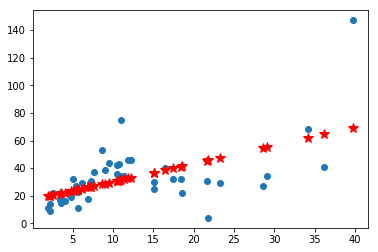

In [26]:
plt.figure(1)
plt.scatter(dataT, labelT)
plt.plot(dataT,dataT*weight+bias,color='red', linestyle='solid', marker='*',markerfacecolor='red', markersize=10)
#plt.plot(dataT,dataT*weight+bias,color='r',linestyle='solid')
plt.show()